## Week 3 Day 4 morning: Graphs and DFS

In [1]:
%run "boaz_utils.ipynb"

# Graph connectivity

But first, some helper functions from yesterday

In [2]:
def neighbors(G,u):
    return G[u][:]

def isedge(G,u,v):
    for x in neighbors(G, u):
        if x == v:
            return True
    return False

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j): 
    if not isedge(G, i, j):
        G[i].append(j)
        
def emptygraph(n):
    G = []
    for i in range(n):
        G.append([])
    return G

In [3]:
def undirect(G):
    H = emptygraph(len(G))
    for u in vertices(G):
        for v in neighbors(G, u):
            addedge(H, u, v)
            addedge(H, v, u)
    return H

Given $i,j$ and a graph $G$: find out if $i$ has a path to $j$ (perhaps indirectly) in the graph

Here is a natural suggestion for a recursive algorithm:

$connected(i,j,G)$ is True if $i$ is a neighbor of $j$, and otherwise it is True if there is some neighbor $k$ of $i$ such that $k$ is connected to $j$. 

Let's code it up try to see what happens:

In [4]:
def connected(start, target, G):
    print(".",end="")
    if start == target:
        return True
    else:
        for k in neighbors(G, start):
            if connected(k, target, G):
                return True
        return False

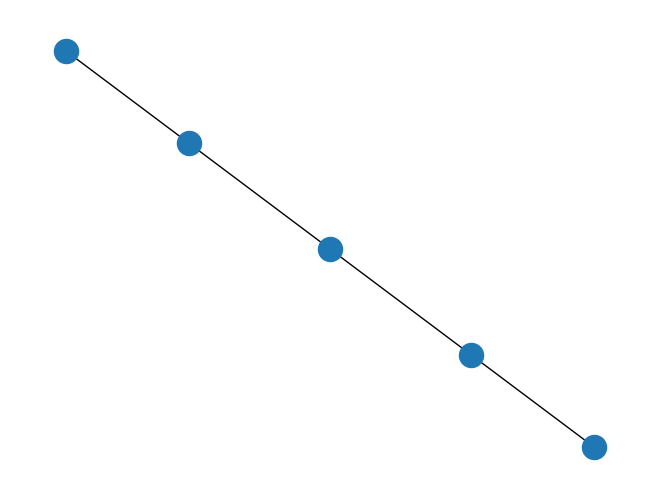

In [5]:
G = undirect([[1],[2],[3],[4],[]])
draw_graph(G)

In [6]:
connected(0,1,G)

..

True

In [7]:
connected(0,2,G)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RecursionError: maximum recursion depth exceeded

In [8]:
connected(0,3,G)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RecursionError: maximum recursion depth exceeded

The problem is that we are getting into an infinite loop! 
We can fix this by remembering which vertices we visited.

In [14]:
def connected(source, target, G):

    def helper(source, target, G, visited):
        if not (source in visited):
            visited.append(source)
        if source == target:
            return True
        else:
            for k in neighbors(G, source):
                if not (k in visited):
                    visited.append(k)
                    if helper(k, target, G, visited):
                        return True
            return False
            
    return helper(source, target, G, [])
    

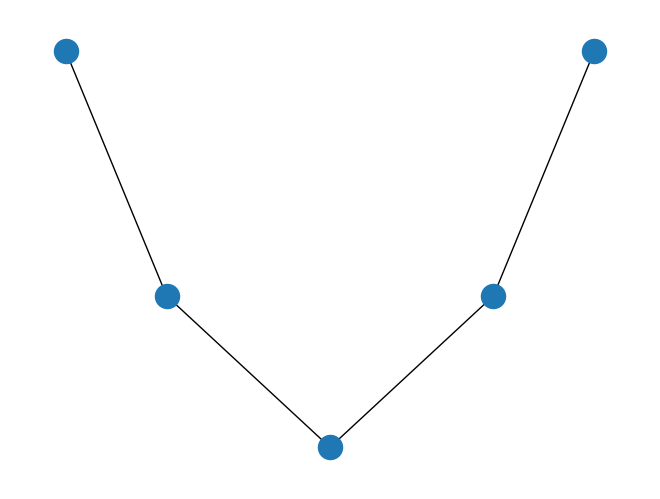

In [12]:
G = undirect([[1],[2],[3],[4],[]])
draw_graph(G)

In [15]:
print(connected(0, 1, G))
#print('next one')
print(connected(0, 2, G))

True
True


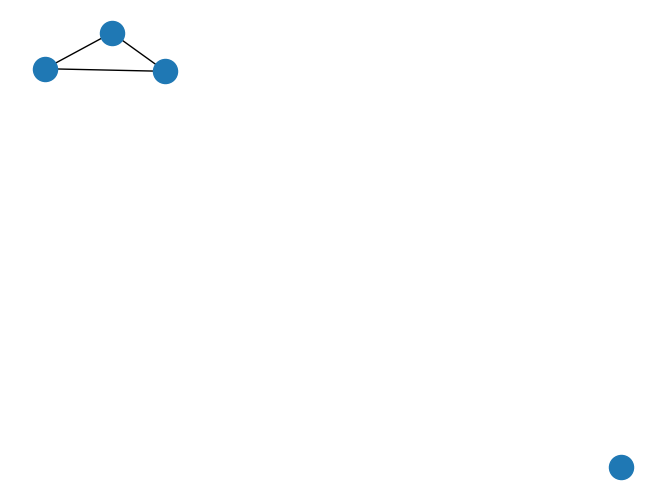

In [17]:
G = undirect([[1],[2],[0],[]])
draw_graph(G)

In [18]:
print (connected(0,1,G) , connected(0,3,G))

True False


In [19]:
def make_grid(n): # return a n by n grid with an isolated vertex
    G = emptygraph(n*n)
    for i in range(n):
        for j in range(n):
            v = i*n+j
            if i<n-1: addedge(G,v,(i+1)*n+j)
            if j<n-1: addedge(G,v,i*n+j+1)
    G = undirect(G)
    return G
 
def grid_input(n):
    return (0,n*n,make_grid(n)+[[]])

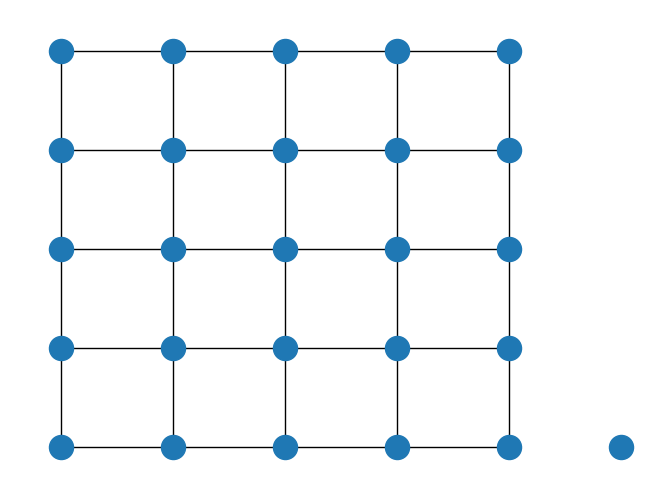

In [21]:
(s,t,G) = grid_input(5)
draw_graph(G, "grid_layout")

In [24]:
connected(0,25,G)

False

## Can speed up by changing how 'visited' works. Make it a length n list, where visited[u] is True if we ever visited vertex u and False otherwise

In [28]:
def search(u, G, visited):
    visited[u] = True
    for v in neighbors(G, u):
        if not visited[v]:
            search(v, G, visited)

# DFS stands for "Depth First Search"
def dfs(source, target, G):
    visited = [False]*len(G)
    search(source, G, visited)
    return visited[target]

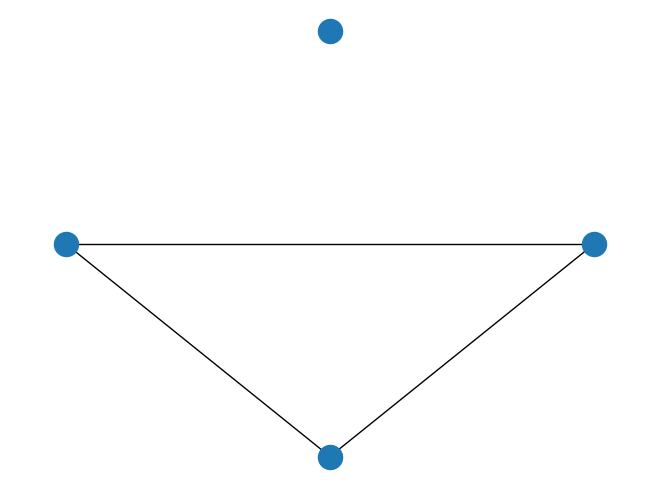

In [26]:
G = undirect([[1],[2],[0],[]])
draw_graph(G)

In [29]:
print (dfs(0,1,G) , dfs(0,3,G))

True False


## What order does DFS visit vertices in this graph?

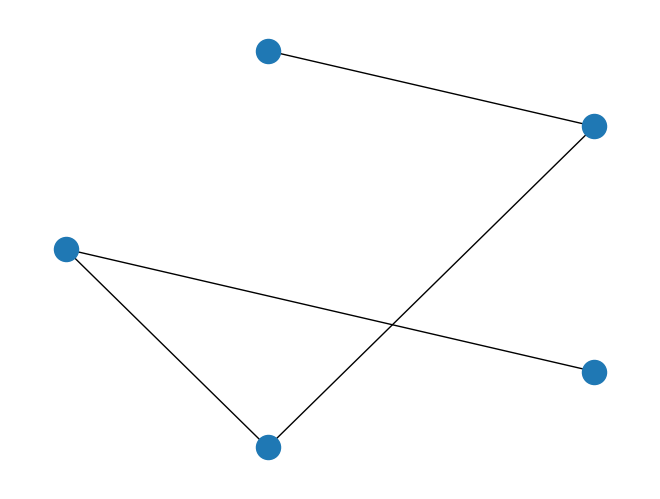

In [30]:
G = undirect([[1,4],[2],[3],[2],[0]])
draw_graph(G)

## Image segmentation with DFS

In [ ]:
%pip install termcolor

In [ ]:
JA = [
'XXXXXXXXXXXX....XXXXX..',
'......XX.......XX...XX.',
'......XX.......XX...XX.',
'......XX.......XXXXXXX.',
'XX....XX.......XX...XX.',
'XXXXXXXX.......XX...XX.',
]

In [ ]:
from termcolor import colored # colored(text,color) prints text in color 

def print_image(img):
    for s in img:
        l = ''
        for c in s:
            if c == '.':
                l += colored("█", 'white')
            else:
                l += colored("█",'green')
        print(l)

In [ ]:
print_image(JA)

In [ ]:
# isolate different objects in an image with DFS
# returns a list of images, each one containing only a single object
def isolate_components(img):
    n = len(img)
    m = len(img[0])
    visited = []
    object_ids = []
    for _ in range(n):
        visited.append([False]*m)
        object_ids.append([None]*m)
    cur_object = 0
    
    def search(x, y, img):
        visited[x][y] = True
        object_ids[x][y] = cur_object
    
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx==0 and dy==0:
                    continue
                nx = x + dx
                ny = y + dy
                if nx>=0 and nx<n and ny>=0 and ny<m and img[nx][ny]=='X' and not visited[nx][ny]:
                    search(nx, ny, img)

    for i in range(n):
        for j in range(m):
            if img[i][j]=='X' and not visited[i][j]:
                search(i, j, img)
                cur_object += 1

    imgs = []
    for c in range(cur_object):
        z = []
        for _ in range(n):
            z.append(['.']*m)
        imgs.append(z)
        
    for i in range(n):
        for j in range(m):
            if img[i][j]=='X':
                imgs[object_ids[i][j]][i][j] = 'X'
    
    ans = []
    for z in imgs:
        ans.append([])
        for L in z:
            ans[-1].append("".join(L))
    return ans
        

In [ ]:
for img in isolate_components(JA):
    print_image(img)
    print('\n\n')